<a href="https://colab.research.google.com/github/ImJongHwan/practice-ml-nlp/blob/main/sca/cve/cve_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [8]:
def read_data(url, filename):
  urllib.request.urlretrieve(url, filename=filename)

  f = open(filename, 'r')
  tagged_sentences = []
  sentence = []

  for line in f:
    try :
      strip_line = line.strip()
      if len(strip_line) == 0 or strip_line[0] == '\n':
        if len(sentence) > 0:
          tagged_sentences.append(sentence)
          sentence = []
        continue
      splits = strip_line.split()
      splits[-1] = re.sub(r'\n', '', splits[-1])
      word = splits[0].lower()
      sentence.append([word, splits[-1]])
    except IndexError:
      print('Index Error: ' + line)
  return tagged_sentences

In [9]:
def merge_without_dup(sentences1, sentences2):
  merged = sentences2
  for sen in sentences1:
    if sen not in sentences2:
      merged.append(sen)

  return merged

In [10]:
base_url = 'https://raw.githubusercontent.com/pinkymm/inconsistency_detection/master/dataset/ner_data/'
url_names = ['bypass', 'csrf', 'dirtra', 'dos', 'execution', 'fileinc', 'gainpre', 'httprs', 'infor', 'memc', 'overflow' ,'sqli', 'xss']

merged = []

for url_name in url_names:
  filename_test = url_name + "_test.txt"
  filename_train = url_name + "_train.txt"
  merged = merge_without_dup(merged, read_data(base_url + filename_test, filename_test))
  merged = merge_without_dup(merged, read_data(base_url + filename_train, filename_train))

In [11]:
def read_file(filename):
  f = open(filename, 'r')
  tagged_sentences = []
  sentence = []
  sen_length = 100
  i = 0

  for line in f:
    strip_line = line.strip()
    if i >= sen_length:
      tagged_sentences.append(sentence)
      i = 0
      sentence = []
      continue
    splits = strip_line.split()
    splits[-1] = re.sub(r'\n', '', splits[-1])
    word = splits[0].lower()
    sentence.append([word, splits[-1]])
    i += 1
  return tagged_sentences

In [12]:
merged = merge_without_dup(merged, read_file('cve_product_bio.txt'))
merged = merge_without_dup(merged, read_file('cve_vendor_bio.txt'))

In [13]:
print(f'전체 샘플 개수: {len(merged)}')

전체 샘플 개수: 22015


In [14]:
print('첫번째 샘플: ', merged[0])

첫번째 샘플:  [['0verkill', 'VN'], ['1-script', 'VN'], ['10-4', 'VN'], ['aps', 'VN'], ['10-strike', 'VN'], ['1000guess', 'VN'], ['101', 'VN'], ['project', 'VN'], ['1024', 'VN'], ['cms', 'VN'], ['1024cms', 'VN'], ['1024tools', 'VN'], ['10web', 'VN'], ['111webcalendar', 'VN'], ['11in1', 'VN'], ['11xiaoli', 'VN'], ['project', 'VN'], ['1234n', 'VN'], ['123flashchat', 'VN'], ['129zou', 'VN'], ['12net', 'VN'], ['12planet', 'VN'], ['133', 'VN'], ['13enforme', 'VN'], ['13thmonkey', 'VN'], ['163', 'VN'], ['1800contacts', 'VN'], ['180solutions', 'VN'], ['1byte', 'VN'], ['1c', 'VN'], ['1cdn', 'VN'], ['project', 'VN'], ['1crm', 'VN'], ['1e', 'VN'], ['1kxun', 'VN'], ['1password', 'VN'], ['1scripts', 'VN'], ['1st', 'VN'], ['choice', 'VN'], ['software', 'VN'], ['1st', 'VN'], ['class', 'VN'], ['internet', 'VN'], ['solutions', 'VN'], ['1st', 'VN'], ['news', 'VN'], ['1two', 'VN'], ['1und1', 'VN'], ['1up', 'VN'], ['20', 'VN'], ['20', 'VN'], ['applications', 'VN'], ['21-6', 'VN'], ['productions', 'VN'], ['212c

In [15]:
sentences, ner_tags = [], []
for tagged_sentence in merged:
  try:
    sentence, tag_info =  zip(*tagged_sentence)
    sentences.append(list(sentence))
    ner_tags.append(list(tag_info))
  except ValueError:
    print(tagged_sentence)

In [16]:
print('첫번째 샘플의 문장: ', sentences[0])
print('첫번째 샘플의 레이블: ', ner_tags[0])

첫번째 샘플의 문장:  ['0verkill', '1-script', '10-4', 'aps', '10-strike', '1000guess', '101', 'project', '1024', 'cms', '1024cms', '1024tools', '10web', '111webcalendar', '11in1', '11xiaoli', 'project', '1234n', '123flashchat', '129zou', '12net', '12planet', '133', '13enforme', '13thmonkey', '163', '1800contacts', '180solutions', '1byte', '1c', '1cdn', 'project', '1crm', '1e', '1kxun', '1password', '1scripts', '1st', 'choice', 'software', '1st', 'class', 'internet', 'solutions', '1st', 'news', '1two', '1und1', '1up', '20', '20', 'applications', '21-6', 'productions', '212cafe', '21degrees', '21st', 'century', 'insurance', '2200net', '22lixian', 'project', '2345', 'security', 'guard', 'project', '2345.cc', '23andme', '23systems', '24link', '2500mhz', '2532gigs', '26thavenue', '29o3', 'cms', '2bits', '2brightsparks', '2checkout', '2coolcode', '2daybiz', '2enetworx', '2fax', '2fly', '2g', 'live', 'tv', 'project', '2glux', '2kblater', '2kgames', '2n', '2ndquadrant', '2pisoftware', '2rv', '2sic', '

샘플의 최대 길이: 198
샘플의 평균 길이: 42


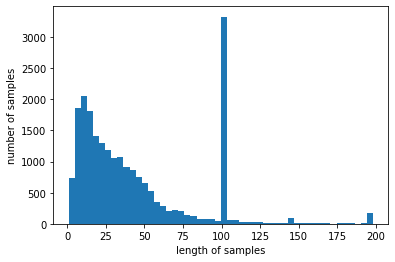

In [17]:
print('샘플의 최대 길이: %d' % max(len(sentence) for sentence in sentences))
print('샘플의 평균 길이: %d' % (sum(map(len, sentences)) / len(sentences)))
plt.hist([len(sentence) for sentence in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
vocab_size = 22000
src_tokenizer = Tokenizer(num_words=vocab_size, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)

In [19]:
tag_size = len(tar_tokenizer.word_index) + 1
print(f'단어 집합의 크기: {vocab_size}')
print(f'개체명 태깅 정보 집합의 크기: {tag_size}')

단어 집합의 크기: 22000
개체명 태깅 정보 집합의 크기: 5


In [20]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)

In [21]:
print('첫번째 샘플의 문장: ', X_train[0])
print('첫번째 샘플의 레이블: ', y_train[0])

첫번째 샘플의 문장:  [1, 1, 1, 19055, 1, 1, 8333, 15, 3623, 99, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 9456, 1, 1, 19056, 1, 1, 1, 1, 1, 15, 19057, 1, 1, 19058, 1, 3624, 4127, 86, 3624, 575, 77, 632, 3624, 366, 19059, 1, 1, 686, 686, 769, 1, 9457, 1, 1, 1, 11921, 3775, 1, 1, 15, 1, 47, 2924, 15, 1, 1, 1, 1, 1, 1, 1, 6117, 99, 1, 1, 1, 1, 1, 1, 1, 1, 14089, 612, 1046, 15, 19060, 1, 1, 19061, 1, 1, 1, 1, 1, 1, 1303, 6654, 19062]
첫번째 샘플의 레이블:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [22]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [23]:
decoded = []
for index in X_train[0]:
  decoded.append(index_to_word[index])

print(f'기존 문장: {sentences[0]}')
print(f'빈도수가 낮은 단어가 OOV 처리된 문장: {decoded}')

기존 문장: ['0verkill', '1-script', '10-4', 'aps', '10-strike', '1000guess', '101', 'project', '1024', 'cms', '1024cms', '1024tools', '10web', '111webcalendar', '11in1', '11xiaoli', 'project', '1234n', '123flashchat', '129zou', '12net', '12planet', '133', '13enforme', '13thmonkey', '163', '1800contacts', '180solutions', '1byte', '1c', '1cdn', 'project', '1crm', '1e', '1kxun', '1password', '1scripts', '1st', 'choice', 'software', '1st', 'class', 'internet', 'solutions', '1st', 'news', '1two', '1und1', '1up', '20', '20', 'applications', '21-6', 'productions', '212cafe', '21degrees', '21st', 'century', 'insurance', '2200net', '22lixian', 'project', '2345', 'security', 'guard', 'project', '2345.cc', '23andme', '23systems', '24link', '2500mhz', '2532gigs', '26thavenue', '29o3', 'cms', '2bits', '2brightsparks', '2checkout', '2coolcode', '2daybiz', '2enetworx', '2fax', '2fly', '2g', 'live', 'tv', 'project', '2glux', '2kblater', '2kgames', '2n', '2ndquadrant', '2pisoftware', '2rv', '2sic', '2wire'

In [24]:
max_len = 200
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)

In [25]:
y_train[1]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

In [27]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [28]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (17612, 200)
훈련 샘플 레이블의 크기 : (17612, 200, 5)
테스트 샘플 문장의 크기 : (4403, 200)
테스트 샘플 레이블의 크기 : (4403, 200, 5)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [30]:
embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
138/138 [==============================] - 280s 2s/step - loss: 0.0824 - accuracy: 0.8881 - val_loss: 0.0266 - val_accuracy: 0.9625
Epoch 2/8
138/138 [==============================] - 265s 2s/step - loss: 0.0176 - accuracy: 0.9745 - val_loss: 0.0154 - val_accuracy: 0.9779
Epoch 3/8
138/138 [==============================] - 263s 2s/step - loss: 0.0084 - accuracy: 0.9884 - val_loss: 0.0137 - val_accuracy: 0.9821
Epoch 4/8
138/138 [==============================] - 263s 2s/step - loss: 0.0059 - accuracy: 0.9919 - val_loss: 0.0119 - val_accuracy: 0.9851
Epoch 5/8
138/138 [==============================] - 265s 2s/step - loss: 0.0043 - accuracy: 0.9941 - val_loss: 0.0110 - val_accuracy: 0.9867
Epoch 6/8
138/138 [==============================] - 263s 2s/step - loss: 0.0055 - accuracy: 0.9920 - val_loss: 0.0120 - val_accuracy: 0.9858
Epoch 7/8
138/138 [==============================] - 264s 2s/step - loss: 0.0037 - accuracy: 0.9950 - val_loss: 0.0146 - val_accuracy: 0.9855
Epoch 

In [31]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

138/138 [==============================] - 18s 132ms/step - loss: 0.0233 - accuracy: 0.9803

 테스트 정확도: 0.9803


In [32]:
i = 10 # 확인하고 싶은 테스트용 샘플의 인덱스.

# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = model.predict(np.array([X_test[i]]))

# 확률 벡터를 정수 레이블로 변경.
y_predicted = np.argmax(y_predicted, axis=-1)

# 원-핫 벡터를 정수 인코딩으로 변경.
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
a                : O       O
remote           : O       O
code             : O       O
execution        : O       O
vulnerability    : O       O
in               : O       O
libstagefright   : O       O
in               : O       O
mediaserver      : O       O
in               : O       O
android          : SN      SN
7.0              : SV      SV
before           : SV      SV
OOV              : SV      SV
could            : O       O
enable           : O       O
an               : O       O
attacker         : O       O
using            : O       O
a                : O       O
specially        : O       O
crafted          : O       O
file             : O       O
to               : O       O
cause            : O       O
memory           : O       O
corruption       : O       O
during           : O       O
media            : O       O
file             : O       O
and              : O       O
data             : O       O
proces

In [33]:
import csv
import sys

In [34]:
csv_file = open('cve_contents.csv', 'r')
rdr = csv.reader(csv_file)

max_int = sys.maxsize
while True:
  try:
    csv.field_size_limit(max_int)
    break;
  except OverflowError:
    max_int = int(max_int/10)

contents = []
for line in rdr:
  contents.append(line[1])

print(len(contents))

99300


In [35]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
preprocess = []
for content in contents:
  tokenized_sentences = sent_tokenize(content)
  for tokenized_sentence in tokenized_sentences:
    tokenized_words = word_tokenize(tokenized_sentence)
    preprocessed_words = []
    for tokenized_word in tokenized_words:
      preprocessed_words.append(tokenized_word.lower())
    preprocess.append(preprocessed_words)

len(preprocess)

210471

In [37]:
preprocess[0]

['a',
 'flaw',
 'was',
 'found',
 'in',
 'the',
 'virtio-net',
 'device',
 'of',
 'qemu',
 '.']

샘플의 최대 길이: 966
샘플의 평균 길이: 24


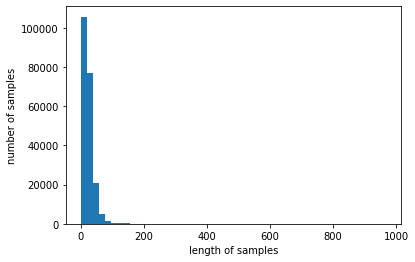

In [38]:
print('샘플의 최대 길이: %d' % max(len(pre) for pre in preprocess))
print('샘플의 평균 길이: %d' % (sum(map(len, preprocess)) / len(preprocess)))
plt.hist([len(sentence) for sentence in preprocess], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
target_vocab_size = 22000
target_tokenizer = Tokenizer(num_words=target_vocab_size, oov_token='OOV')
target_tokenizer.fit_on_texts(preprocess)

In [40]:
z_test = target_tokenizer.texts_to_sequences(preprocess)

In [41]:
target_index_to_word = target_tokenizer.index_word

In [42]:
decoded_target = []
for index in z_test[0]:
  decoded_target.append(target_index_to_word[index])

print(f'기존 문장: {preprocess[0]}')
print(f'빈도수가 낮은 단어가 OOV 처리된 문장: {decoded_target}')

기존 문장: ['a', 'flaw', 'was', 'found', 'in', 'the', 'virtio-net', 'device', 'of', 'qemu', '.']
빈도수가 낮은 단어가 OOV 처리된 문장: ['a', 'flaw', 'was', 'found', 'in', 'the', 'OOV', 'device', 'of', 'qemu', '.']


In [43]:
max_len = 200
z_test = pad_sequences(z_test, padding='post', maxlen=max_len)

In [44]:
z_test[1]

array([   17,   205,    50,  3974,  1979,    25,     4,   528,    26,
           1,     2,    44,  5938,     5, 11566,     4,  2381, 21212,
         955,    32,   273,     2,   235,     5,    59,  1514,     8,
         104,  1132,   366,     3,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [45]:
print(f'타겟 샘플 문장의 크기: ', z_test.shape)

타겟 샘플 문장의 크기:  (210471, 200)


In [55]:
i = 90 # 확인하고 싶은 테스트용 샘플의 인덱스.

print(z_test[i])
# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
z_predicted = model.predict(np.array([z_test[i]]))

# 확률 벡터를 정수 레이블로 변경.
z_predicted = np.argmax(z_predicted, axis=-1)

print("{:15}|{}".format("단어", "예측값"))
print(30 * "-")

for word, pred in zip(z_test[i], z_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {}".format(index_to_word[word], index_to_ner[pred].upper()))

[ 40  29  17  12  16   4   1 221 822   3   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
단어             |예측값
------------------------------
file             : O
service          : O
remote           : O
in               : O
vulnerability    : O
(                : SN
OOV      